In [14]:
# Import dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate cities list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
#Get API url 
url = "http://api.openweathermap.org/data/2.5/weather?q="
    
    
#See list of cities to get information and lists
#cities 

#Chose Cape Town to see other columns
#response = requests.get(url + "cape town" + "&appid=" + w_key)
#w_city_d = response.json()
#pprint(w_city_d)

# Perform API Calls

Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
#Temperature is in Kelvins so change the unit of measurement to F°
units = "imperial"
#Create lists for variables needed
all_cities = []
lat=[]
lng=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

#Create a counter for sucessive API calls
city_count = 0
set_count = 1

In [5]:
# Print things at start of loop 
print("Beginning Data Retrieval")
print("------------------------------")
#Make loop for going trough cities 

for one_city in cities: 
 
    #Add exceptions in loop to avoid it stopping from missing city values 
    try:
        
    #query_url= f'{url}{one_city}&appid={w_key}&units={units}'
        query_url =url + one_city + "&appid=" + w_key +"&units=imperial"
        response = requests.get(query_url).json()
    
    
        city_count = city_count + 1
    #Append data series loop through cities will be used    
        all_cities.append(one_city)
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if city_count > 50: 
            set_count += 1 
            city_count = 0 
        
        print(f'Processing Record {city_count} of {set_count}|{one_city}')
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

#Add intervals between queries to stay within API limits 
        time.sleep(2)



#Data retrieval is complete so announce it
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of 1|omboue
Processing Record 2 of 1|aginskoye
Processing Record 3 of 1|atuona
Processing Record 4 of 1|moron
City not found. Skipping...
Processing Record 6 of 1|hermanus
Processing Record 7 of 1|torbay
Processing Record 8 of 1|dikson
Processing Record 9 of 1|ancud
Processing Record 10 of 1|taltal
Processing Record 11 of 1|ushuaia
Processing Record 12 of 1|rikitea
Processing Record 13 of 1|kapaa
City not found. Skipping...
Processing Record 15 of 1|takoradi
Processing Record 16 of 1|iquitos
Processing Record 17 of 1|wellington
Processing Record 18 of 1|hearst
Processing Record 19 of 1|mahebourg
Processing Record 20 of 1|avarua
Processing Record 21 of 1|hokitika
Processing Record 22 of 1|san alberto
City not found. Skipping...
Processing Record 24 of 1|victoria
Processing Record 25 of 1|kalmunai
Processing Record 26 of 1|gazanjyk
Processing Record 27 of 1|port moresby
Processing Record 28 of 1|brumado
Processin

Processing Record 37 of 5|povenets
Processing Record 38 of 5|port augusta
Processing Record 39 of 5|severo-kurilsk
Processing Record 40 of 5|methoni
Processing Record 41 of 5|amuntai
Processing Record 42 of 5|saint-philippe
Processing Record 43 of 5|tiksi
Processing Record 44 of 5|boddam
Processing Record 45 of 5|ulundi
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of 5|airai
Processing Record 49 of 5|ekhabi
Processing Record 0 of 6|marsa matruh
Processing Record 1 of 6|jalu
Processing Record 2 of 6|yuanping
City not found. Skipping...
Processing Record 4 of 6|palotina
Processing Record 5 of 6|tigzirt
Processing Record 6 of 6|leningradskiy
Processing Record 7 of 6|sayyan
Processing Record 8 of 6|maningrida
Processing Record 9 of 6|shulin
Processing Record 10 of 6|wanxian
Processing Record 11 of 6|sevsk
Processing Record 12 of 6|bathsheba
Processing Record 13 of 6|christchurch
Processing Record 14 of 6|pipri
Processing Record 15 of 6|cayenne
Processing Rec

Processing Record 23 of 10|lakatoro
Processing Record 24 of 10|caravelas
Processing Record 25 of 10|point fortin
Processing Record 26 of 10|marzuq
Processing Record 27 of 10|san ramon
Processing Record 28 of 10|onda
Processing Record 29 of 10|souris
Processing Record 30 of 10|caconda
Processing Record 31 of 10|eureka
Processing Record 32 of 10|carballo
Processing Record 33 of 10|dombarovskiy
Processing Record 34 of 10|kloulklubed
Processing Record 35 of 10|souillac
Processing Record 36 of 10|kolda
City not found. Skipping...
Processing Record 38 of 10|castro
Processing Record 39 of 10|itoman
Processing Record 40 of 10|beyneu
Processing Record 41 of 10|chuy
Processing Record 42 of 10|ballymena
Processing Record 43 of 10|flin flon
Processing Record 44 of 10|bandarbeyla
Processing Record 45 of 10|abu samrah
Processing Record 46 of 10|shingu
Processing Record 47 of 10|waw
Processing Record 48 of 10|lubango
Processing Record 49 of 10|lokosovo
Processing Record 0 of 11|matamoros
Processing R

# Convert Raw Data to DataFrame

Export the city data into a .csv.Display the DataFrame

In [6]:
#Convert to pandas DataFrame (code from class)
weather_dict = ({"City":all_cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

weather_df = pd.DataFrame.from_dict(weather_dict, orient='index').transpose()
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,omboue,-1.5746,9.2618,77.86,89,100,10.29,GA,1619634247
1,aginskoye,51.1,114.53,25.95,65,58,12.35,RU,1619634247
2,atuona,-9.8,-139.033,79.47,72,99,15.12,PF,1619634248
3,moron,-34.6534,-58.6198,75.99,47,9,3,AR,1619634248
4,taolanaro,-34.4187,19.2345,57.99,83,77,8.61,ZA,1619634251


Inspect the data and remove the cities where the humidity > 100%.

In [7]:
#Export city data into a csv 
filename = "cities.csv"
weather_df.to_csv("../output/cities.csv", index=False, header=True)



In [8]:
#Get the indices of cities that have humidity over 100%.
weather_df["Humidity"].max()

100

Max humidity is not over 100% so we don't need to clean data. 

# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max temperature (F°)')

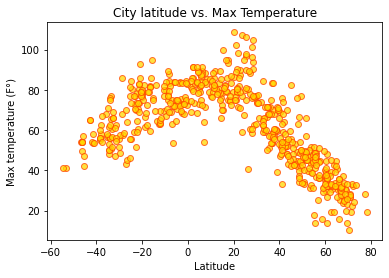

In [29]:
#Create variables 
latitude_p = weather_df["Lat"]
temp_p= weather_df["Max Temp"]
humidity_p=weather_df["Humidity"]
cloud_p=weather_df["Cloudiness"]
wind_sp = weather_df["Wind Speed"]

#Create scatterplot 
plt.scatter(latitude_p, temp_p, marker="o", facecolors="gold", edgecolors="orangered",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F°)")

#Create png image 


### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

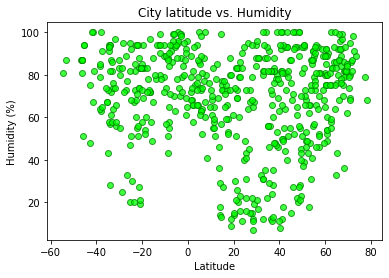

In [26]:
#Create scatterplot 
plt.scatter(latitude_p, humidity_p, marker="o", facecolors="lime", edgecolors="green",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

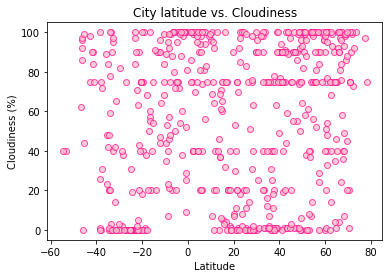

In [27]:
#Create scatterplot 
plt.scatter(latitude_p, cloud_p, marker="o", facecolors="pink", edgecolors="deeppink",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

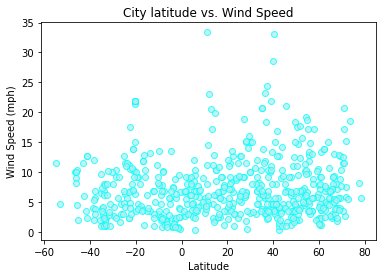

In [31]:
#Create scatterplot 
plt.scatter(latitude_p, wind_sp, marker="o", facecolors="paleturquoise", edgecolors="cyan",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [36]:
#Make a group for the north hemisphere and the south hemisphere 
north_hem = weather_df[weather_df['Lat'] > 0]
south_hem= weather_df[weather_df['Lat'] < 0]

In [37]:
#Check both dataframes to see if they work 
north_hem.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,aginskoye,51.1,114.53,25.95,65,58,12.35,RU,1619634247
5,hermanus,47.6666,-52.7314,48,87,75,18.41,CA,1619634251
6,torbay,73.5069,80.5464,25.65,97,100,8.86,RU,1619634252
11,rikitea,22.0752,-159.319,73.99,83,75,3.44,US,1619634254
12,kapaa,4.8845,-1.7554,83.46,78,79,10.29,GH,1619634258
15,iquitos,49.6835,-83.6665,57.2,28,89,4.61,CA,1619634260
19,avarua,7.7611,-73.3922,79.09,89,100,4.36,CO,1619634261
20,hokitika,22.2855,114.158,73,90,100,1.01,HK,1619634154
21,san alberto,7.4167,81.8167,80.42,81,99,6.04,LK,1619634264
22,illoqqortoormiut,39.2446,55.5154,70.66,50,66,17.09,TM,1619634265


In [40]:
south_hem.head()
print(south_hem.dtypes)
#Everything is an object so change values to what they have to be 
north_hem["Lat"] = north_hem.Lat.astype(float)

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object


<ipython-input-40-16c58d5f9993>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_hem["Lat"] = north_hem.Lat.astype(float)


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
#Create values for regression and correlation graphs 
#north_lat = north_hem["Lat"]
#north_temp =north_hem["Max Temp"]

# Equations for correlation and regression

correlation = st.pearsonr(north_hem["Lat"].astype(float), north_hem["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Max Temp"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
#plt.scatter(north_lat, north_temp, marker="o", facecolors="orchid", edgecolors="darkviolet", s=north_lat, alpha=0.75)
#plt.plot(north_lat,regress_values,"b-")


#Add title and labels to scatter plot 
#plt.title( "Northern Hemisphere vs. Max Temperature")
#plt.xlabel("Latitude")
#plt.ylabel("Max Temperature (F°)")

#plt.annotate(line_eq,(5,10),fontsize=15,color="red")
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#print(f"The r-squared is: {rvalue**2}")
#print(line_eq)

AttributeError: 'float' object has no attribute 'shape'

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression